In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
raw_data=pd.read_csv("D:/EDU/Udemy/datascience_csv_files/p5_advanced_stats_ml/S33_L204/1_03_Dummies.csv")
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


# creating dummy variable and copying data frames  and mapping



In [8]:
data=raw_data.copy()
data["Attendance"]=data["Attendance"].map({'Yes':1,'No':0})
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [11]:
y=data["GPA"]
x1=data[["SAT","Attendance"]]
x1,y

(     SAT  Attendance
 0   1714           0
 1   1664           0
 2   1760           0
 3   1685           0
 4   1693           0
 ..   ...         ...
 79  1936           1
 80  1810           1
 81  1987           0
 82  1962           1
 83  2050           1
 
 [84 rows x 2 columns], 0     2.40
 1     2.52
 2     2.54
 3     2.74
 4     2.83
       ... 
 79    3.71
 80    3.71
 81    3.73
 82    3.76
 83    3.81
 Name: GPA, Length: 84, dtype: float64)

In [12]:
x=sm.add_constant(x1) #adds x0 constant i.e. 1 always in x1 frame using stats model 
result=sm.OLS(y,x).fit()
result.summary()

C:\Users\vikash arya\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           2.19e-15
Time:                        11:38:32   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# if we add a normal regression line the graph output will be of not use

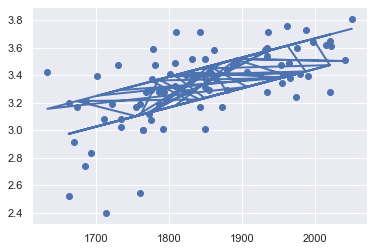

In [24]:
plt.scatter(data["SAT"],y)

yhat=0.6439+0.0014*data["SAT"]+0.2226*data["Attendance"]  #it will change for 1 and 0 in attendence
                                                          #...so we will not get any insights

fig=plt.plot(data["SAT"],yhat,lw=2)

plt.show()

# SO we need to divide the reg. line on basis  of input 0,1 for attendence..to get better insights

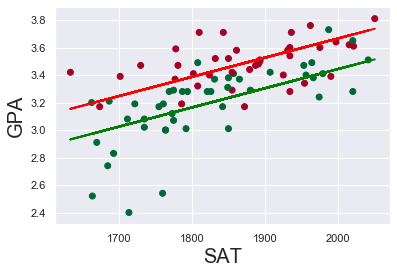

In [30]:
plt.scatter(data["SAT"],y,c=data["Attendance"], cmap='RdYlGn_r') #cmap is used to map color in graph on basis of differet values of data
yhat_no=0.6439+0.0014*data["SAT"]
yhat_yes=0.6439+0.2226+0.0014*data["SAT"]

fig=plt.plot(data["SAT"],yhat_no,lw=2,c='green')
fig=plt.plot(data["SAT"],yhat_yes,lw=2,c='red')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

In [31]:
x


,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [32]:
new_data=pd.DataFrame({'const':1,'SAT':[1700,1650],'Attendance':[0,1]})
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1650,1


In [33]:
new_data.rename(index={0:'Bob',1:'Sam'}) #changing index name

,const,SAT,Attendance
Bob,1,1700,0
Sam,1,1650,1


In [34]:
prediction=result.predict(new_data)
prediction

0    3.023513
1    3.176167
dtype: float64

# Joining the prediction as a column to "new_data" dataframe

In [36]:
#first convert prediction result into a dataframe

predictionDF=pd.DataFrame({'Predicted_Values':prediction})
predictionDF

,Predicted_Values
0,3.023513
1,3.176167


In [37]:
new_data_joined=new_data.join(predictionDF)
new_data_joined

,const,SAT,Attendance,Predicted_Values
0,1,1700,0,3.023513
1,1,1650,1,3.176167


In [38]:
#Renaming values in cloumn index

new_data_joined.rename(index={0:'Bob',1:'Sam'})

,const,SAT,Attendance,Predicted_Values
Bob,1,1700,0,3.023513
Sam,1,1650,1,3.176167


In [42]:
# Renaming Colimn name

new_data_joined.rename(columns={'Attendance':'Attendance_renamed'})

,const,SAT,Attendance_renamed,Predicted_Values
0,1,1700,0,3.023513
1,1,1650,1,3.176167
